## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset

combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID" )
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
unique_mice = combined_df["Mouse ID"].value_counts()
unique_mice 

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
get_duplicate = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
get_duplicate.value_counts()



Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

unique_mice = combined_df.loc[combined_df.duplicated(["Mouse ID"])]
get_duplicate.count

<bound method DataFrame.count of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  >

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study= combined_df.loc[combined_df["Mouse ID"]!="g989"]
clean_study.head(909)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
904,g867,Stelasyn,Female,9,25,0,45.000000,0
905,g867,Stelasyn,Female,9,25,5,46.880749,0
906,g867,Stelasyn,Female,9,25,10,48.183402,0
907,g867,Stelasyn,Female,9,25,15,51.060419,1


In [19]:
# Checking the number of mice in the clean DataFrame.
clean_study["Mouse ID"].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


mice_mean= combined_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mice_median= combined_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
mice_variance= combined_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
mice_stdev= combined_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
mice_sem= combined_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


mouse_summ_dict = {"Mean": mice_mean, 
                  "Median": mice_median,
                  "Variance": mice_variance,
                  "Stdev": mice_stdev,
                  "Sem": mice_sem}



In [15]:
mouse_summ_df = pd.DataFrame(mouse_summ_dict)
mouse_summ_df

,Mean,Median,Variance,Stdev,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var", "std", "sem"]})
 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

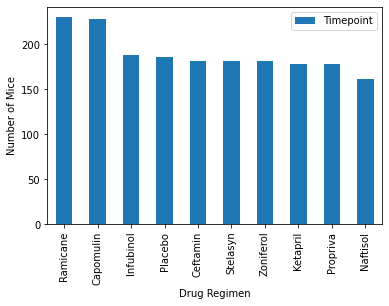

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_drugs = combined_df["Drug Regimen"].unique()
mice_times =combined_df["Drug Regimen"].value_counts()

mice_drug_time_df = pd.DataFrame({
                                    "Drug Regimen": mice_drugs,
                                    "Timepoint": mice_times})
mice_drug_time_df.plot.bar('Drug Regimen', 'Timepoint')
plt.ylabel("Number of Mice")

Text(0.5, 0, 'Drug Regiment')

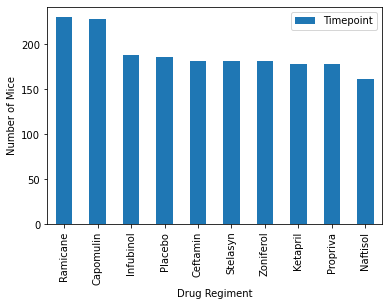

In [46]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mice_drugs = combined_df["Drug Regimen"].unique()
mice_times =combined_df["Drug Regimen"].value_counts()


mice_drug_time_df.plot.bar('Drug Regimen', 'Timepoint')
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regiment")

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_sex = combined_df.groupby(["Sex"]).count()
mice_sex


,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


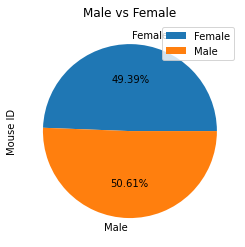

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_pie = mice_sex.plot(kind = "pie", x = "male", y = "Mouse ID", grid = True, title = "Male vs Female", 
autopct = "%.2f%%")
                        
plt.show()

## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint = clean_study.groupby(['Mouse ID'])['Timepoint'].max()
greatest_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [87]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

combined_df = pd.merge(greatest_timepoint, clean_study, on=(["Mouse ID","Timepoint"]))
combined_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [177]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []


# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    combined_df_regimen = combined_df.loc[combined_df["Drug Regimen"] == treatment,"Tumor Volume (mm3)"]
    tumor_volume_data.append(combined_df_regimen)
tumor_volume_data



[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [242]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
                          
                          

In [155]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



## Line and Scatter Plots

In [243]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [276]:
medicine = clean_study.groupby(['Drug Regimen', 'Weight (g)','Tumor Volume (mm3)']).size()
reg_df = pd.DataFrame(medicine)
reg_df

0
Drug Regimen Weight (g) Tumor Volume (mm3)   
Capomulin    15         28.167397           1
                        28.484033           1
                        30.206825           1
                        32.915292           1
                        36.065835           1
...                                        ..
Zoniferol    30         50.159721           1
                        52.539949           1
                        54.060983           1
                        56.770280           1
                        60.413709           1

[1699 rows x 1 columns]

In [245]:
regimen_scatter_df = combined_df.loc[combined_df['Drug Regimen']=='Capomulin']
regimen_scatter_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


In [246]:

C_scat = regimen_scatter_df.groupby([regimen_scatter['Weight (g)']])['Tumor Volume (mm3)'].mean()
C_scat = C_scat.reset_index()
C_scat

,Weight (g),Tumor Volume (mm3)
0,15,28.484033
1,17,30.287623
2,19,36.416666
3,20,37.311846
4,21,39.175015
5,22,39.571049
6,23,39.602030
7,24,47.685963
8,25,44.060363


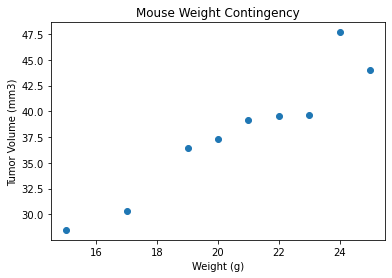

In [257]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.scatter(C_scat['Weight (g)'], C_scat['Tumor Volume (mm3)'])
plt.title('Mouse Weight Contingency')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
#plt.plot(x_var, slope_formula)
plt.show()

## Correlation and Regression

In [2]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


